## Day 18

https://adventofcode.com/2023/day/18

In [2]:
def readInput18(infile):
    with open(infile) as f:
        digplan = []
        for l in f.read().strip().splitlines():
            d = l.split(" ")
            digplan.append((d[0],int(d[1]),d[2][1:-1]))
        return digplan

### Part 1

Flood-filling a grid. 

In [17]:
import numpy as np

dirs = {"R": (+1,0), "L":(-1,0), "D": (0,+1), "U": (0,-1)}

def fill_plan(digplan):
    digmap = {}
    p = (0,0)
    for d,s,c in digplan:
        dx,dy = dirs[d]
        for _ in range(s):
            x,y = p
            p = (x+dx,y+dy)
            digmap[p] = c
    
    X = [ x for x,y in digmap.keys() ]
    Y = [ y for x,y in digmap.keys() ]

    xmin,xmax = min(X),max(X)
    ymin,ymax = min(Y),max(Y)
    
    plan = np.zeros((ymax-xmin+1,xmax-xmin+1))
    
    for x,y in digmap.keys():
        plan[y-ymin][x-xmin] = 1
    
    return digmap, plan

In [18]:
# Recursive flood fill algorithm

import sys
sys.setrecursionlimit(1_000_000)

def flood_fill_util(x, y, target_color, replacement_color, image):
    rows, cols = len(image), len(image[0])
    if x < 0 or x >= rows or y < 0 or y >= cols:
        return
    if image[x][y] != target_color:
        return
    image[x][y] = replacement_color
    flood_fill_util(x-1, y, target_color, replacement_color, image)
    flood_fill_util(x+1, y, target_color, replacement_color, image)
    flood_fill_util(x, y-1, target_color, replacement_color, image)
    flood_fill_util(x, y+1, target_color, replacement_color, image)

def flood_fill(x, y, replacement_color, image):
    target_color = image[x][y]
    if target_color != replacement_color:
        flood_fill_util(x, y, target_color, replacement_color, image)

In [19]:
def part1(infile,start=(1,1)):
    digplan = readInput18(infile)
    digmap, plan = fill_plan(digplan)
    flood_fill(start[0],start[1], 1, plan)
    return len(plan[plan==1]), plan

In [20]:
p10, plan0 = part1("examples/example18.txt",(1,1))
print("Test 1:",p10)

Test 1: 62


Part 1: 50746


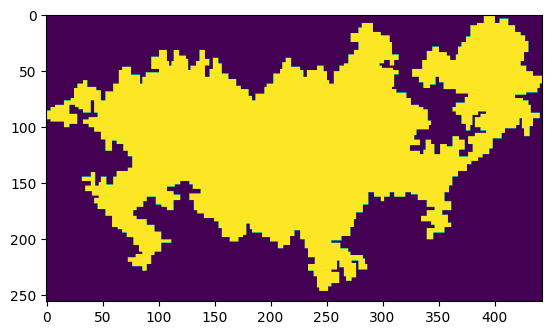

In [21]:
p11, plan1 = part1("AOC2023inputs/input18.txt",(100,100))
print("Part 1:",p11)

import matplotlib.pyplot as plt
plt.imshow(plan1)

### Part 2

Using [Shoelace's formula](https://en.wikipedia.org/wiki/Shoelace_formula) to compute area within the polygon defined by the points' coordinates. A correction for the polygone perymeter is needed.

In [102]:
def translate_digplan(digplan):
    dirdic = { 0: "R", 1: "D", 2: "L", 3: "U" }
    digplan2 = []
    for d,s,c in digplan:
        steps = int(c[1:-1],16)
        i = int(c[-1])
        digplan2.append((dirdic[i],steps))
    return digplan2

def digplan_to_points(digplan2):
    p = (0,0)
    points = [p]
    for d,s in digplan2:
        x,y = p
        p = (x+dirs[d][0]*s, y+dirs[d][1]*s)
        points.append(p)
    return points

def plot_plan(infile):
    digplan = readInput18(infile)
    digplan2 = translate_digplan(digplan)
    points = digplan_to_points(digplan2)
    X = [x for x,y in points]
    Y = [-y for x,y in points]
    plt.plot(X,Y)

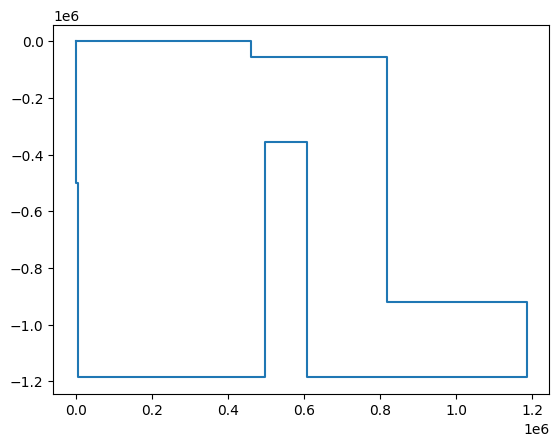

In [103]:
plot_plan("examples/example18.txt")

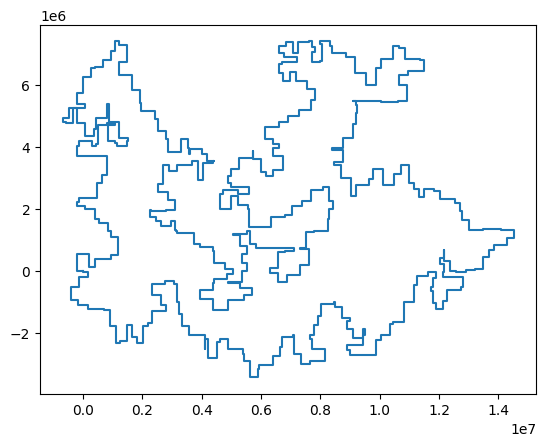

In [104]:
plot_plan("AOC2023inputs/input18.txt")

In [111]:
def det(a,b):
    xa,ya = a
    xb,yb = b
    return xa*yb-ya*xb

def area(digplan2):
    points = digplan_to_points(digplan2)
    # Shoelace's fomula
    tot = 0
    for i in range(len(points)):
        p1 = points[i]
        p2 = points[(i+1)%len(points)]
        tot += det(p1,p2)
    return tot//2 + sum([ s for d,s in digplan2 ]) // 2 + 1

def part2(infile):
    digplan = readInput18(infile)
    digplan2 = translate_digplan(digplan)
    return area(digplan2)

In [115]:
print("Test 2:", part2("examples/example18.txt")) # 952408144115
print("Part 2:", part2("AOC2023inputs/input18.txt")) # 70086216556038

Test 2: 952408144115
Part 2: 70086216556038
